In [1]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append('../src/')
import dataset_prep

### Création des csv avec les nouvelles features

In [2]:
# Chemin du dossier contenant tous les .csv
data_folder = '../data'

Nécessite les csv suivants : 
 - `merged1.csv`  (DoS - 13)
 - `merged2.csv`   (DoS Random - 14)
 - `merged3.csv`   (DoS Disruptive - 15)
 - `merged4.csv`   (Dos Random Sybil - 18)
 - `merged5.csv`   (Dos Disruptive Sybil - 19)

In [3]:
def new_features(merged):
    
    print(merged.shape)
    
    sender = []
    max_speed1 = []
    max_speed2 = []
    nb_packets_sent = []


    for i in range(len(merged['sender'].unique())):
        print(i)
        sender.append(merged['sender'].unique()[i])
        max_speed1.append(merged[merged['sender'] == merged['sender'].unique()[i]]['spd_x_send'].max())
        max_speed2.append(merged[merged['sender'] == merged['sender'].unique()[i]]['spd_y_send'].max())
        nb_packets_sent.append(len(merged[merged['sender'] == merged['sender'].unique()[i]]))

    senders = pd.DataFrame()
    senders['sender'] = sender
    senders['max_speed1'] = max_speed1
    senders['max_speed2'] = max_speed2
    senders['nb_packets_sent'] = nb_packets_sent
    
    merged = merged.merge(senders, on='sender')
    
    merged['frequency1'] = abs(merged['spd_x_send'] - merged['max_speed1']/2)
    merged['frequency2'] = abs(merged['spd_y_send'] - merged['max_speed2']/2)
    
    merged = merged.sort_values(by=['sender', 'receiver', 'sendTime'])
    merged['time_diff'] = merged.groupby(['sender', 'receiver'])['sendTime'].diff()
    
    merged['distRealSR1'] = merged['pos_x_rec'] - merged['pos_x_send']
    merged['distRealSR2'] = merged['pos_y_rec'] - merged['pos_y_send']
    merged['diffSpdSR1'] = merged['spd_x_rec'] - merged['spd_x_send']
    merged['diffSpdSR2'] = merged['spd_y_rec'] - merged['spd_y_send']
    merged['diffAclSR1'] = merged['acl_x_rec'] - merged['acl_x_send']
    merged['diffAclSR2'] = merged['acl_y_rec'] - merged['acl_y_send']
    merged['diffHedSR1'] = merged['hed_x_rec'] - merged['hed_x_send']
    merged['diffHedSR2'] = merged['hed_y_rec'] - merged['hed_y_send']

    merged['deltaPosRec1'] = abs(merged['pos_x_rec'] - merged['pos_x_rec_f'])
    merged['deltaPosRec2'] = abs(merged['pos_y_rec'] - merged['pos_y_rec_f'])
    merged['deltaSpdRec1'] = abs(merged['spd_x_rec'] - merged['spd_x_rec_f'])
    merged['deltaSpdRec2'] = abs(merged['spd_y_rec'] - merged['spd_y_rec_f'])
    merged['deltaAclRec1'] = abs(merged['acl_x_rec'] - merged['acl_x_rec_f'])
    merged['deltaAclRec2'] = abs(merged['acl_y_rec'] - merged['acl_y_rec_f'])
    merged['deltaHedRec1'] = abs(merged['hed_x_rec'] - merged['hed_x_rec_f'])
    merged['deltaHedRec2'] = abs(merged['hed_y_rec'] - merged['hed_y_rec_f'])

    merged['deltaPos1'] = abs(merged['pos_x_send'] - merged['pos_x_send_f'])
    merged['deltaPos2'] = abs(merged['pos_y_send'] - merged['pos_y_send_f'])
    merged['deltaSpd1'] = abs(merged['spd_x_send'] - merged['spd_x_send_f'])
    merged['deltaSpd2'] = abs(merged['spd_y_send'] - merged['spd_y_send_f'])
    merged['deltaAcl1'] = abs(merged['acl_x_send'] - merged['acl_x_send_f'])
    merged['deltaAcl2'] = abs(merged['acl_y_send'] - merged['acl_y_send_f'])
    merged['deltaHed1'] = abs(merged['hed_x_send'] - merged['hed_x_send_f'])
    merged['deltaHed2'] = abs(merged['hed_y_send'] - merged['hed_y_send_f'])

    merged['distance'] = np.sqrt(merged['distRealSR1']**2 + merged['distRealSR2']**2)
    merged['difSpeed'] = np.sqrt(merged['diffSpdSR1']**2 + merged['diffSpdSR2']**2)
    merged['estAoA'] = np.arctan(merged['distRealSR2']/merged['distRealSR1'])
    
    
    return(merged)

In [ ]:
# DoS - 13
df_dos_random = pd.read_csv(data_folder + '/merged1.csv')
# Create a new csv file with new features from merged2.csv
new_features(df_dos_random).to_csv(os.path.join(data_folder + '', 'DoS_0709_new_columns.csv'), index=False)

In [27]:
# DoS Random  - 14
df_dos_random = pd.read_csv(data_folder + '/merged2.csv')
# Create a new csv file with new features from merged2.csv
new_features(df_dos_random).to_csv(os.path.join(data_folder + '', 'DoS_Random_0709_new_columns.csv'), index=False)

In [2]:
# DoS Disruptive - 15

df_dos_disruptive = pd.read_csv(data_folder + '/merged3.csv')

new_features(df_dos_disruptive).to_csv(os.path.join(data_folder + '', 'DoS_Disruptive_0709_new_columns.csv'), index=False)

In [6]:
# TODO vérifier le csv merged4.csv parce qu'il y a des labels 19 alors que ça devrait être 18
# DoS Random Sybil - 18
df_dos_random_sybil = pd.read_csv(data_folder + '/merged4.csv')

new_features(df_dos_random_sybil).to_csv(os.path.join(data_folder + '', 'DoS_Random_Sybil_0709_new_columns.csv'), index=False)

(3822887, 51)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


In [7]:
# DoS Disruptive Sybil - 19
df_dos_disruptive_sybil = pd.read_csv(data_folder + '/merged5.csv')

new_features(df_dos_disruptive_sybil).to_csv(os.path.join(data_folder + '', 'DoS_Disruptive_Sybil_0709_new_columns.csv'), index=False)

(3822887, 51)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


In [26]:
# Vérifiaction des labels
df_dos_random_sybil.labelRec.value_counts

<bound method IndexOpsMixin.value_counts of 0           0
1           0
2          19
3           0
4           0
           ..
3822882     0
3822883     0
3822884     0
3822885    19
3822886    19
Name: labelRec, Length: 3822887, dtype: int64>

## DataFrame selection

Import de la base de données

In [3]:
# Colonnes choisies - label, sender & sendTime obligatoires
selected_columns = [
"nb_packets_sent",
"distance",
"distRealSR1",
"pos_y_rec_f",
"pos_y_rec",
"pos_x_rec_f",
"pos_x_rec",
"pos_x_send",
"pos_y_send",
"spd_x_send",
"spd_y_send",
"sendTime",
"receiver",
"sender",
"label"
]

In [4]:
# DoS (13)
df = dataset_prep.import_dataset(data_folder + '/DoS_0709_new_columns.csv', selected_columns)

Nombre de lignes avant nettoyage :  4753433
Nombre de lignes après nettoyage :  4709293


In [91]:
# DoS Random (14)
df = dataset_prep.import_dataset(data_folder + '/DoS_Random_0709_new_columns.csv', selected_columns)

Nombre de lignes avant nettoyage :  4679311
Nombre de lignes après nettoyage :  4636098


In [92]:
# DoS Disruptive (15)
df = dataset_prep.import_dataset(data_folder + '/DoS_Disruptive_0709_new_columns.csv', selected_columns)

Nombre de lignes avant nettoyage :  4667151
Nombre de lignes après nettoyage :  4623869


In [14]:
# DoS Random Sybil (18)
df = dataset_prep.import_dataset(data_folder + '/DoS_Random_Sybil_0709_new_columns.csv', selected_columns)

Nombre de lignes avant nettoyage :  3822887
Nombre de lignes après nettoyage :  3787506


In [ ]:
# DoS Disruptive Sybil (19)
df = dataset_prep.import_dataset(data_folder + '/DoS_Disruptive_Sybil_0709_new_columns.csv', selected_columns)

In [5]:
df.label.value_counts()

13    2648034
0     2061259
Name: label, dtype: int64

## Senders

In [6]:
senders = np.unique(df["sender"].values)
# senders

# Nombre de senders
print(len(senders))

4067


#### Split de la base de données (pas utilisé)

In [47]:
# Copie de la bdd pour récuperer les colonnes sans impacter la vraie base de données

# data_copy = df.copy()
# data_copy = data_copy.drop(["label"], axis=1)

# columns = data_copy.columns
# columns

Index(['sendTime', 'sender', 'receiver', 'pos_x_send', 'pos_y_send',
       'spd_x_send', 'spd_y_send', 'pos_x_rec', 'pos_y_rec', 'pos_x_rec_f',
       'pos_y_rec_f', 'nb_packets_sent', 'distRealSR1', 'distance'],
      dtype='object')

Amélioration à faire :

Séléctionner seulement les sender avec value_counts > 20

Séparation de la base de données : diviser pour régner

/!\ à bien changer l'indice !!

In [7]:
# /!\ attention à bien utiliser la base de données rangée par sender pour limiter la perte de données
# Indice égal à 0, 1 ou 2
# Célia = 0
# Chléo = 1
# Thomas = 2

def split_data_in_3(df, indice):
    # Division de la bdd en 3
    split_data = np.array_split(df,3)

    # Division en plusieurs sous-bdd pour diminuer le temps de calcul par exécution
    #divided_data = np.array_split(split_data[indice],50)

    return split_data

In [8]:
divided_dataframes = split_data_in_3(df.sort_values("sender"),0)

In [9]:
len(divided_dataframes)

3

## Création des séquences

On utilise **flat_sequences_creation(df)**

In [8]:
def sequence_creation(df):
    senders_sequences = np.array()
    senders_label = np.array
    for sender in senders:
        sender_data_sorted = df.loc[df['sender'] == sender].sort_values("sendTime")
        sender_data_sorted = sender_data_sorted.drop(["label","sender"], axis=1)
        sequence_array = np.array

        length = sender_data_sorted.shape[0]
        slide = 10
        start = 0
        end = 20

        # On récupère la valeur du label pour ce sender
        label = df.loc[df['sender'] == sender]['label'].tolist()[0]
        if (length > 20):
            senders_label.append(label)

        # On vérifie qu'il est possible de faire une séquence de taille 20
        while length >= 20:
            # Extraction par tranche de 20 avec une inter de 10
            sequence = sender_data_sorted[start:end]

            # Labels correspondant
            #labels =  pd.Series.tolist(sequence["label"])

            # On transforme les 13 en 1, cette formule marche toujours si on met d'autres types d'attaques
            #labels[:] = [x if x == 0 else 1 for x in labels]

            # Attribution des tableaux numpy
            sequence_array = np.append(sequence_array, np.array(sequence.values, dtype=object))
            #label_array.append(labels)

            # Mise à jour des variables
            start += slide
            end += slide
            length -= 10
        
        if len(sequence_array)>0:
            senders_sequences = np.append(senders_sequences, np.array(sequence_array, dtype=object))

    
    return senders_sequences, senders_label

In [7]:
def flat_sequence_creation(df):
    senders_sequences = []
    senders_label = []

    for sender in senders:
        # Données d'un seul sender rangée en fonction de l'heure d'envoi
        sender_data_sorted = df.loc[df['sender'] == sender].sort_values("sendTime")

        # On récupère la valeur du label pour ce sender
        """ On remplasse toute les valeur !=0 en 1 """
        if sender_data_sorted['label'].tolist()[0] != 0 :
            label=1
        else :
            label = sender_data_sorted['label'].tolist()[0]
        #On supprime les colonnes label et sender
        sender_data_sorted = sender_data_sorted.drop(["label","sender"], axis=1)
        
        #sequence_array = []

        length = sender_data_sorted.shape[0]
        slide = 10
        start = 0
        end = 20

        # On vérifie qu'il est possible de faire une séquence de taille 20
        while length > 20:
            # Extraction par tranche de 20 avec une inter de 10
            sequence = sender_data_sorted[start:end]

            # Labels correspondant
            #labels =  pd.Series.tolist(sequence["label"])

            # On transforme les 13 en 1, cette formule marche toujours si on met d'autres types d'attaques
            #labels[:] = [x if x == 0 else 1 for x in labels]

            # Attribution des tableaux numpy
            senders_sequences.append(np.array(sequence.values.tolist(), dtype=np.float32))
            senders_label.append(label)

            # Mise à jour des variables
            start += slide
            end += slide
            length -= 10

    return senders_sequences, senders_label

In [8]:
sorted_dataset = df.sort_values("sender")

In [9]:
sequence_test, label_test = flat_sequence_creation(sorted_dataset)
#label_test

sequence_test, label_test = sequence_creation(df)

In [76]:
len(sequence_test)

464647

# Initialisation des données

In [10]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import layers, applications, utils, models, optimizers, Input, callbacks
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [49]:
# Transformation en array numpy
X = np.array(sequence_test)
y = np.array(label_test, dtype=np.float32)

In [50]:
# Réduire le temps de training en prenant les 100000 premiers éléments
X = X[:100000]
y = y[:100000]

In [51]:
# Séparation en données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [52]:
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (90000, 20, 13)
y_train :  (90000,)
X_test :  (10000, 20, 13)
y_test :  (10000,)


In [26]:
y_train

array([1., 0., 1., ..., 1., 1., 0.], dtype=float32)

# Modèle dense simple

In [22]:
# TODO amélioration du model dense avec du dropout ? 

simple_model = keras.Sequential([
    layers.Dense(128,input_shape=(20, 13), activation='relu'),
    #layers.BatchNormalization(), # les batchNormalization fond baisser l'accuracy 
    layers.Dense(256, activation='relu'),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear') # avec relu on perd un peu d'accuracy
])

2023-02-01 13:51:03.206784: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-01 13:51:03.206817: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (student-laptop): /proc/driver/nvidia/version does not exist
2023-02-01 13:51:03.207356: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
print("INPUT")
[print(i.shape, i.dtype) for i in simple_model.inputs]
print("OUTPUT")
[print(o.shape, o.dtype) for o in simple_model.outputs]
print("LAYERS")
[print(l.name, l.input_shape, l.dtype) for l in simple_model.layers]

INPUT
(None, 20, 13) <dtype: 'float32'>
OUTPUT
(None, 20, 1) <dtype: 'float32'>
LAYERS
dense (None, 20, 13) float32
dense_1 (None, 20, 128) float32
dense_2 (None, 20, 256) float32
dense_3 (None, 20, 64) float32


[None, None, None, None]

In [24]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
opt = keras.optimizers.SGD(learning_rate=0.01)
simple_model.compile(loss='binary_crossentropy', optimizer=opt, metrics='accuracy')

In [25]:
history = simple_model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.3, callbacks=[callback])

Epoch 1/20


2023-02-01 13:51:11.533153: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 66915680 exceeds 10% of free system memory.


500/503 [============================>.] - ETA: 0s - loss: 8.5787 - accuracy: 0.4438

2023-02-01 13:51:18.343339: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28679040 exceeds 10% of free system memory.


503/503 [==============================] - 8s 14ms/step - loss: 8.5796 - accuracy: 0.4438 - val_loss: 8.5840 - val_accuracy: 0.4435
Epoch 2/20
503/503 [==============================] - 8s 15ms/step - loss: 8.5796 - accuracy: 0.4438 - val_loss: 8.5840 - val_accuracy: 0.4435
Epoch 3/20
503/503 [==============================] - 8s 16ms/step - loss: 8.5796 - accuracy: 0.4438 - val_loss: 8.5840 - val_accuracy: 0.4435
Epoch 4/20
503/503 [==============================] - 7s 13ms/step - loss: 8.5796 - accuracy: 0.4438 - val_loss: 8.5840 - val_accuracy: 0.4435
Epoch 5/20
503/503 [==============================] - 7s 13ms/step - loss: 8.5796 - accuracy: 0.4438 - val_loss: 8.5840 - val_accuracy: 0.4435
Epoch 6/20
503/503 [==============================] - 7s 13ms/step - loss: 8.5796 - accuracy: 0.4438 - val_loss: 8.5840 - val_accuracy: 0.4435


<AxesSubplot:>

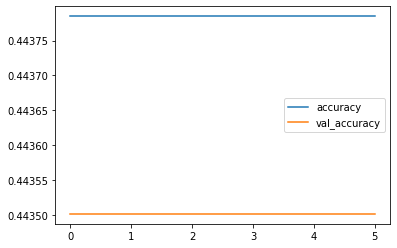

In [26]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

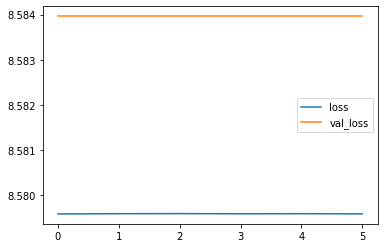

In [27]:
history_df.loc[:, ['loss', 'val_loss']].plot()

In [28]:
y_pred=simple_model.predict(X_test)
y_pred

array([[[-2675.2456],
        [-2594.6848],
        [-2536.4214],
        ...,
        [-2671.0312],
        [-2673.9482],
        [-2675.3208]],

       [[-2535.6345],
        [-2558.4849],
        [-2514.2288],
        ...,
        [-2540.9268],
        [-2514.7249],
        [-2518.0361]],

       [[-2317.2705],
        [-2313.675 ],
        [-2316.7458],
        ...,
        [-2313.2676],
        [-2317.3103],
        [-2313.7146]],

       ...,

       [[-2850.0059],
        [-2889.824 ],
        [-2872.5151],
        ...,
        [-2881.8242],
        [-2888.7388],
        [-2876.1653]],

       [[-2607.457 ],
        [-2608.5615],
        [-2554.9438],
        ...,
        [-2603.5146],
        [-2607.5068],
        [-2549.032 ]],

       [[-2176.254 ],
        [-2182.1982],
        [-2185.5642],
        ...,
        [-2134.818 ],
        [-2118.3774],
        [-2165.62  ]]], dtype=float32)

In [29]:
eval=simple_model.evaluate(X_test, y_test)
eval

320/320 [==============================] - 1s 3ms/step - loss: 8.7198 - accuracy: 0.4347


[8.719759941101074, 0.4346974790096283]

# RNN

In [30]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    '''
    hidden_units : nombre de neurones dans la couche SimpleRNN
    dense_units : nombre de neurones dans la couche Dense
    activation : liste des deux fonctions d'activation
    '''
    opt = keras.optimizers.SGD(learning_rate=0.01)
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, return_sequences=True, activation=activation[0]))
    model.add(SimpleRNN(32, activation=activation[0]))
    model.add(keras.layers.BatchNormalization())
    model.add(Dense(64, activation=activation[1]))
    model.add(Dense(units=dense_units, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics='accuracy')
    return model

#demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

rnn_model = create_RNN(32, 1, (20, 13), activation=['relu', 'relu'])
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [31]:
history = rnn_model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.3, callbacks=[callback])

Epoch 1/20


2023-02-01 14:02:22.859087: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 66915680 exceeds 10% of free system memory.


498/503 [============================>.] - ETA: 0s - loss: 0.4202 - accuracy: 0.8221

2023-02-01 14:02:28.860898: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28679040 exceeds 10% of free system memory.


503/503 [==============================] - 7s 11ms/step - loss: 0.4198 - accuracy: 0.8221 - val_loss: 0.3501 - val_accuracy: 0.8445
Epoch 2/20
503/503 [==============================] - 5s 11ms/step - loss: 0.3368 - accuracy: 0.8514 - val_loss: 0.8098 - val_accuracy: 0.6363
Epoch 3/20
503/503 [==============================] - 6s 11ms/step - loss: 0.3346 - accuracy: 0.8521 - val_loss: 0.3379 - val_accuracy: 0.8465
Epoch 4/20
503/503 [==============================] - 5s 11ms/step - loss: 0.3296 - accuracy: 0.8526 - val_loss: 0.4370 - val_accuracy: 0.7911
Epoch 5/20
503/503 [==============================] - 5s 11ms/step - loss: 0.3272 - accuracy: 0.8531 - val_loss: 0.3326 - val_accuracy: 0.8497
Epoch 6/20
503/503 [==============================] - 6s 11ms/step - loss: 0.3259 - accuracy: 0.8545 - val_loss: 0.3301 - val_accuracy: 0.8478
Epoch 7/20
503/503 [==============================] - 6s 11ms/step - loss: 0.3239 - accuracy: 0.8565 - val_loss: 0.3863 - val_accuracy: 0.8265
Epoch 8/20

<AxesSubplot:>

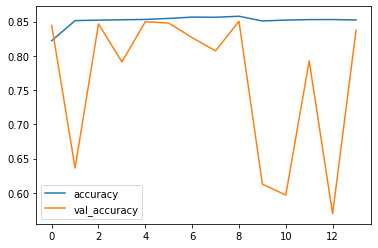

In [32]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

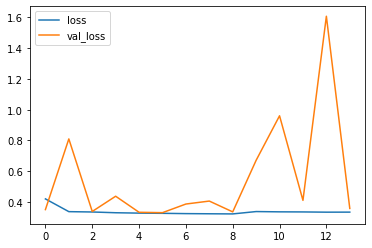

In [33]:
history_df.loc[:, ['loss', 'val_loss']].plot()

In [34]:
y_pred=rnn_model.predict(X_test)
y_pred

array([[0.0814237 ],
       [0.25599977],
       [0.99995077],
       ...,
       [0.11677942],
       [0.6047377 ],
       [0.9872718 ]], dtype=float32)

In [35]:
# arrondir les prédictions avant de les evalués
y_pred = [0 if x < 0.5 else 1 for x in y_pred] 
y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83      4440
         1.0       0.89      0.83      0.86      5774

    accuracy                           0.85     10214
   macro avg       0.85      0.85      0.85     10214
weighted avg       0.85      0.85      0.85     10214



In [36]:
eval=rnn_model.evaluate(X_test, y_test)
eval

320/320 [==============================] - 1s 3ms/step - loss: 0.3330 - accuracy: 0.8488


[0.332971453666687, 0.8488349318504333]

# Test LSTM

In [119]:
lstm_model = keras.Sequential([
    layers.Dense(32, input_shape=(20,13), activation='relu'),
    layers.LSTM(128, return_sequences=True),
    layers.LSTM(128),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [121]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
opt = keras.optimizers.SGD(learning_rate=0.01)
lstm_model.compile(loss='binary_crossentropy', optimizer=opt, metrics='accuracy')

In [ ]:
lstm_model.summary()

In [123]:
history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.3, callbacks=[callback])

Epoch 1/20
394/394 [==============================] - 27s 51ms/step - loss: 0.6845 - accuracy: 0.5667 - val_loss: 0.6855 - val_accuracy: 0.5652
Epoch 2/20
394/394 [==============================] - 18s 46ms/step - loss: 0.6847 - accuracy: 0.5671 - val_loss: 0.6848 - val_accuracy: 0.5652
Epoch 3/20
394/394 [==============================] - 17s 43ms/step - loss: 0.6847 - accuracy: 0.5671 - val_loss: 0.6848 - val_accuracy: 0.5652
Epoch 4/20
394/394 [==============================] - 17s 43ms/step - loss: 0.6847 - accuracy: 0.5671 - val_loss: 0.6848 - val_accuracy: 0.5652
Epoch 5/20
394/394 [==============================] - 17s 43ms/step - loss: 0.6844 - accuracy: 0.5671 - val_loss: 0.6846 - val_accuracy: 0.5652
Epoch 6/20
394/394 [==============================] - 18s 46ms/step - loss: 0.6845 - accuracy: 0.5671 - val_loss: 0.6846 - val_accuracy: 0.5652


<AxesSubplot: >

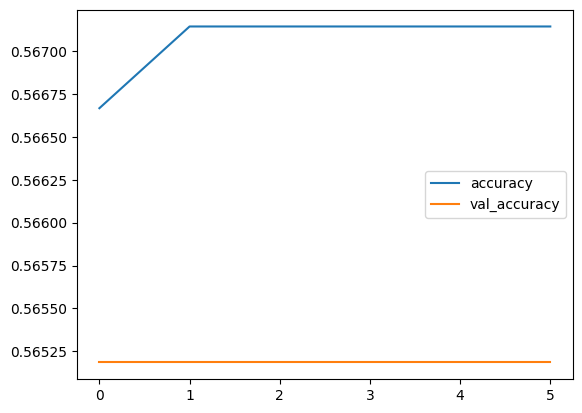

In [124]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

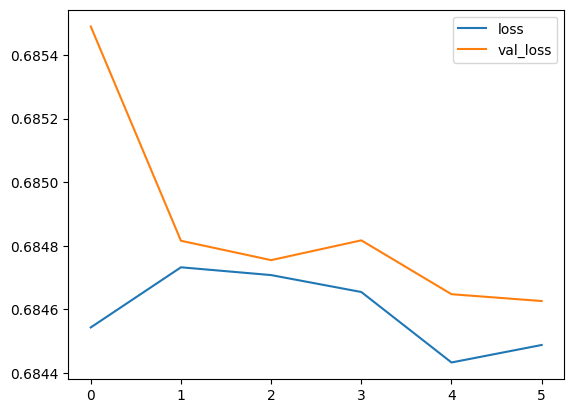

In [125]:
history_df.loc[:, ['loss', 'val_loss']].plot()

In [119]:
y_pred=lstm_model.predict(X_test)
y_pred

array([[0.54696834],
       [0.54696834],
       [0.54696834],
       ...,
       [0.54696834],
       [0.54696834],
       [0.54696834]], dtype=float32)

In [120]:
eval=lstm_model.evaluate(X_test, y_test)
eval

320/320 [==============================] - 3s 9ms/step - loss: 0.6846 - accuracy: 0.5653


[0.6846228241920471, 0.5653025507926941]

# Mélange SimpleRNN et LSTM

In [126]:
lstm_rnn_model = keras.Sequential([
    layers.Dense(32,input_shape=(20,13), activation='relu'),
    layers.LSTM(128, return_sequences=True, activation='relu'), # return_sequences à True pour que la sortie soit de dimension 3
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.SimpleRNN(64,activation='relu', return_sequences=True),
    layers.SimpleRNN(32,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)
opt = keras.optimizers.SGD(learning_rate=0.01)
lstm_rnn_model.compile(loss='binary_crossentropy', optimizer=opt, metrics='accuracy')

In [127]:
history = lstm_rnn_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.3, callbacks=[callback])

Epoch 1/25
394/394 [==============================] - 58s 137ms/step - loss: 0.5769 - accuracy: 0.6630 - val_loss: 2909.3411 - val_accuracy: 0.5652
Epoch 2/25
394/394 [==============================] - 17s 43ms/step - loss: 0.4208 - accuracy: 0.7880 - val_loss: 4.5898 - val_accuracy: 0.5652
Epoch 3/25
394/394 [==============================] - 18s 47ms/step - loss: 0.3692 - accuracy: 0.8277 - val_loss: 2.1021 - val_accuracy: 0.5650
Epoch 4/25
394/394 [==============================] - 20s 52ms/step - loss: 0.3320 - accuracy: 0.8589 - val_loss: 101.0154 - val_accuracy: 0.5652
Epoch 5/25
394/394 [==============================] - 19s 48ms/step - loss: 0.2869 - accuracy: 0.8816 - val_loss: 37.9704 - val_accuracy: 0.4348
Epoch 6/25
394/394 [==============================] - 19s 48ms/step - loss: 0.2521 - accuracy: 0.8998 - val_loss: 15.6581 - val_accuracy: 0.5652
Epoch 7/25
394/394 [==============================] - 16s 42ms/step - loss: 0.2346 - accuracy: 0.9095 - val_loss: 7.4290 - val_a

<AxesSubplot: >

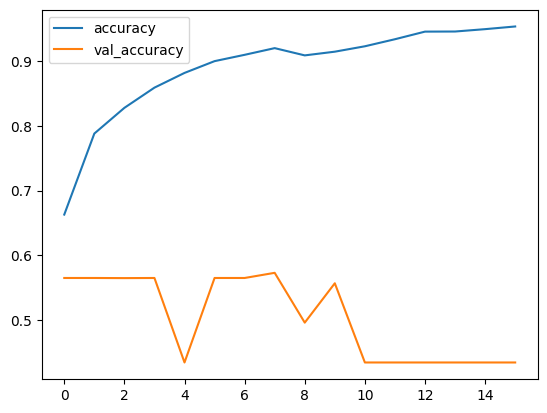

In [129]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

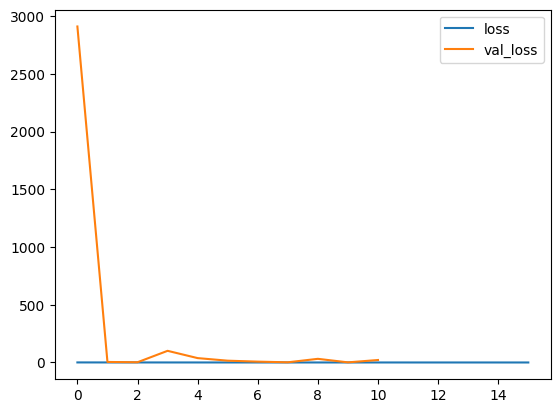

In [130]:
history_df.loc[:, ['loss', 'val_loss']].plot()

In [131]:
y_pred=lstm_rnn_model.predict(X_test)
y_pred

63/63 [==============================] - 2s 16ms/step


array([[0.9998226 ],
       [0.9999999 ],
       [0.99991626],
       ...,
       [0.9995111 ],
       [0.9235139 ],
       [0.9999978 ]], dtype=float32)

In [132]:
eval=lstm_rnn_model.evaluate(X_test, y_test)
eval

63/63 [==============================] - 1s 23ms/step - loss: 1.6335 - accuracy: 0.5675


[1.6334964036941528, 0.5674999952316284]

63/63 [==============================] - 2s 29ms/step - loss: 1.6335 - accuracy: 0.5675
Evaluation du modèle : [1.6334964036941528, 0.5674999952316284]
63/63 [==============================] - 1s 15ms/step


Text(45.722222222222214, 0.5, 'True Labels')

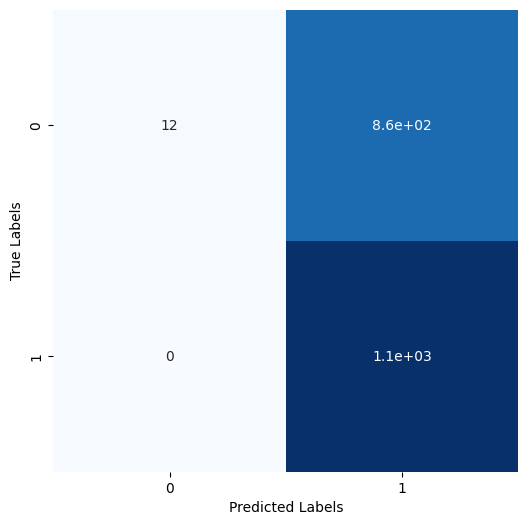

In [133]:
print(f"Evaluation du modèle : {lstm_rnn_model.evaluate(X_test, y_test)}")
y_pred = lstm_rnn_model.predict(X_test)
preds = np.round(y_pred).astype(int)
cm = confusion_matrix(y_test, preds)
fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(cm, annot=True, cbar=False, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Simple GRU

In [53]:
simple_GRU = keras.models.Sequential()
simple_GRU.add( keras.layers.Dense(32,input_shape=(20,13), activation='relu'))
simple_GRU.add( keras.layers.Dropout(0.2) )
simple_GRU.add( keras.layers.BatchNormalization() )
simple_GRU.add( keras.layers.GRU(256, return_sequences=True, activation='relu') )
simple_GRU.add( keras.layers.GRU(256, return_sequences=True, activation='relu') )
simple_GRU.add( keras.layers.GRU(256, return_sequences=False, activation='relu') )
simple_GRU.add( keras.layers.Dropout(0.2) )
simple_GRU.add( keras.layers.BatchNormalization() )
# simple_GRU.add( keras.layers.Dense(64, activation='relu') )
# simple_GRU.add( keras.layers.Dropout(0.2) )
simple_GRU.add( keras.layers.Dense(1, activation='sigmoid') )


In [54]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
opt = keras.optimizers.SGD(learning_rate=0.01)
simple_GRU.compile(loss='binary_crossentropy', optimizer=opt, metrics='accuracy')

In [55]:
history = simple_GRU.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.3, callbacks=[callback])

Epoch 1/25
985/985 [==============================] - 115s 111ms/step - loss: 0.3738 - accuracy: 0.8373 - val_loss: 0.9403 - val_accuracy: 0.5868
Epoch 2/25
985/985 [==============================] - 106s 108ms/step - loss: 0.3593 - accuracy: 0.8390 - val_loss: 0.5020 - val_accuracy: 0.7611
Epoch 3/25
985/985 [==============================] - 116s 117ms/step - loss: 0.3476 - accuracy: 0.8449 - val_loss: 0.7107 - val_accuracy: 0.6635
Epoch 4/25
985/985 [==============================] - 126s 128ms/step - loss: 0.3462 - accuracy: 0.8443 - val_loss: 0.5011 - val_accuracy: 0.7790
Epoch 5/25
985/985 [==============================] - 116s 118ms/step - loss: 0.3433 - accuracy: 0.8449 - val_loss: 0.6469 - val_accuracy: 0.6301
Epoch 6/25
985/985 [==============================] - ETA: 0s - loss: 0.3457 - accuracy: 0.8437

<AxesSubplot: >

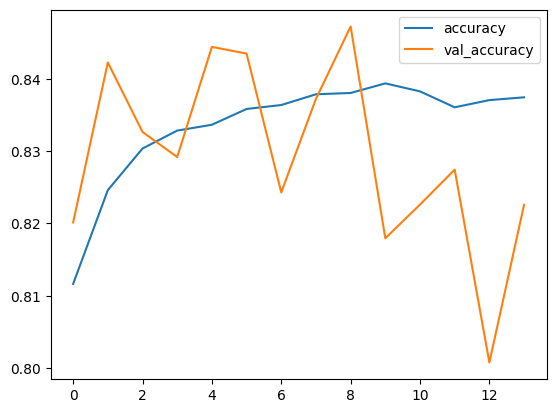

In [38]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

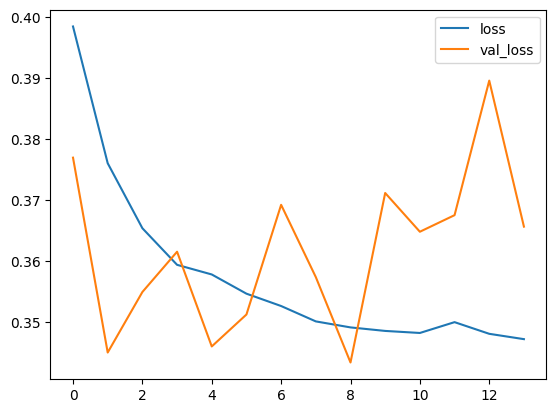

In [39]:
history_df.loc[:, ['loss', 'val_loss']].plot()

In [40]:
y_pred=simple_GRU.predict(X_test)
y_pred

1453/1453 [==============================] - 6s 4ms/step


array([[0.9989568 ],
       [0.27319503],
       [0.18164381],
       ...,
       [0.9999975 ],
       [0.14944792],
       [0.54070604]], dtype=float32)

In [41]:
eval=simple_GRU.evaluate(X_test, y_test)
eval

1453/1453 [==============================] - 5s 4ms/step - loss: 0.3421 - accuracy: 0.8482


[0.34211140871047974, 0.8482083082199097]

1453/1453 [==============================] - 5s 4ms/step - loss: 0.3421 - accuracy: 0.8482
Evaluation du modèle : [0.34211140871047974, 0.8482083082199097]
1453/1453 [==============================] - 5s 3ms/step


Text(45.722222222222214, 0.5, 'True Labels')

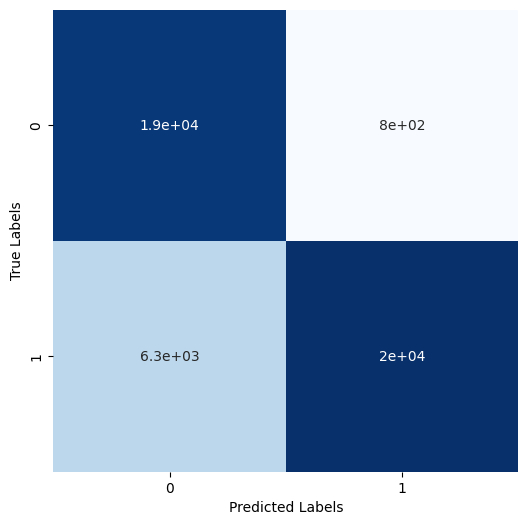

In [42]:
print(f"Evaluation du modèle : {simple_GRU.evaluate(X_test, y_test)}")
y_pred = simple_GRU.predict(X_test)
preds = np.round(y_pred).astype(int)
cm = confusion_matrix(y_test, preds)
fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(cm, annot=True, cbar=False, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')